<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Intro_to_Statistic_in_Python/Random_Numbers_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Statistic in Python**

In [ ]:
# Importing numpy, pandas and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the course datasets from github
# paste Raw URL from github
deals_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/amir_deals.csv"
happiness_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/world_happiness.csv"
food_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/food_consumption.csv"

amir_deals = pd.read_csv(deals_url)
world_happiness = pd.read_csv(happiness_url)
food_consumption = pd.read_csv(food_url)

## FutureWarning

在後續練習鐘，在使用 `groupby()`和 `.agg()`方法時，會遇到了關於 `np.var` 和 `np.std`和 `np.mean` 以及 `np.median` 的 `FutureWarning` 警告，該警告是確保程式碼的兼容性，因為在未來的 pandas 版本中，傳遞可呼叫物件（如 `np.var` 和 `np.std`）的行為將會改變。

##解决方案

| 方法 | 是否解决 `FutureWarning` | 可行性 |
|------|----------------|------|
| `agg(['mean', 'median'])` | ✅ 解决 | 最佳（直接使用 pandas 的方法） |
| `agg([np.mean, np.median])` | ❌ 觸發 | 不建議 |
| `agg([lambda x: np.mean(x), lambda x: np.median(x)])` | ✅ 解决 | 可行 |
| `agg([pd.Series.mean, pd.Series.median])` | ✅ 解决 | 可行 |


# **Random Numbers and Probability 隨機與機率**
章節概要：二元結果事件進行二項分佈建模（分析）

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful.

Finally, you’ll use the binomial distribution to model events with binary outcomes.

## **What are the Chances**

### With or without replacement?
In the video, you learned about two different ways of taking samples: with replacement and without replacement. Although it isn't always easy to tell which best fits various situations, it's important to correctly identify this so that any probabilities you report are accurate. In this exercise, you'll put your new knowledge to the test and practice figuring this out.

**Instructions**

For each scenario, decide whether it's sampling with **replacement** or sampling **without replacement**.

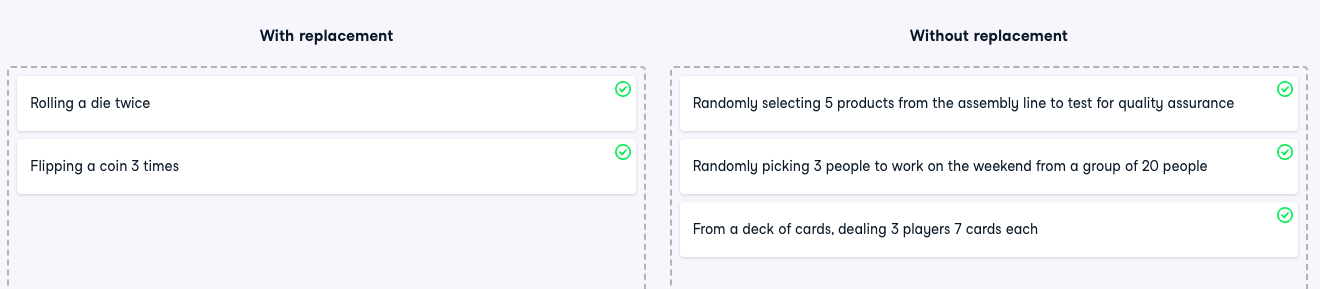


### Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

$$ P(\text{event}) = \frac{\# \text{ways event can happen}}{\text{total } \# \text{ of possible outcomes}} $$

`amir_deals` is available.

**Instructions 1/3**


*   Count the number of deals Amir worked on for each `product` type using `.value_counts()` and store in `counts`.



In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


**Instructions 2/3**

Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as `probs`.

1. 統計**每種產品類型的交易數量**。
2. 將**每種產品類型的交易數量**除以 Amir 經手的**所有交易總數**，即可得到該產品類型交易被選中的機率。

$$ P(\text{Product Type}) = \frac{\text{Number of Deals for Product Type}}{\text{Total Number of Deals}} $$

這邊所考慮的機率一般來說是：
* **邊緣機率 (Marginal Probability)**：指單一事件發生的機率，而不考慮任何其他事件（例如交易的日期、客戶等等）。

* **無條件機率 (Unconditional Probability)**：指一個事件發生的機率，不受任何其他條件限制（沒有添加任何條件）。

**額外思考**

若是要計算**某特定"商品類型"的交易**中，**每種產**品被選中的條件機率或分組機率：

$$ P(\text{Product Type}) = \frac{\text{Number of Deals for Each Product Type}}{\text{Total Number of Each Product Deals}} $$

* **條件機率 (Conditional Probability)**：已知另一個事件發生的情況下，某個事件發生的機率。
已知交易是關於'Laptops'，那麼選擇 'MacBook Pro' 的機率是多少。

* **分組機率 (Grouped Probability)**：指將數據分成不同的組別，然後計算每個組別中特定事件發生的機率。
我們想比較 'Laptops' 類別中，'MacBook Pro' 和 'Dell XPS' 的被選中機率，以及 'Phones' 類別中，'iPhone' 和 'Samsung Galaxy' 的被選中機率。

In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
# Calculate probability of picking a deal with each product
probs =  counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
# unique_products = amir_deals['product'].nunique()
# print(unique_products)

# Calculate probability of picking a deal with each product
probs = amir_deals['product'].value_counts(normalize= True)

print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: proportion, dtype: float64


**Instructions 3/3**

**Question**

If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C? (still a marginal probability or unconditional probability)

Possible answers


* 15%

* 80.43%

* 8.43% ✅

* 22.5%

* 124.3%


### Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

**Instructions 1/3**

* Set the random seed to 24.
* Take a sample of 5 deals without replacement and store them as sample_without_replacement.

In [ ]:
# # Set random seed
# ____

# # Sample 5 deals without replacement
# sample_without_replacement = ____
# print(sample_without_replacement)

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


**Instructions 2/3**

* Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace= True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


**Instructions 3/3**

**Question**


What type of sampling is better to use for this situation?

**Possible answers**


* With replacement

* Without replacement ✅

* It doesn't matter


## **Discrete distributions**

### Creating a probability distribution 機率分布


A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.


---


Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. `pandas `is loaded as `pd`, `numpy` is loaded as `np`, and `matplotlib.pyplot` is loaded as `plt`.

**Big question**

what's probability distribution?

 Probability distribution describes how likely each possible outcome is in a random situation.

1. list all the different outcomes that could happen (**possible outcome**)
2. count the probability of each outcome occurring (**assign probabilities**)
3.In any probability distribution, if you add up the probability of every possible outcome, the total must be 1 (or 100%) (**Sum of Probabilities = 1**)

Example:  Rolling a six side fair dice. (**Discrete distributions 離散分布**)

1. possible outcome : rolling a fair six-sided die, the outcomes are 1, 2, 3, 4, 5, and 6.
2. assign probabilities: the probability on each side is 1/6
3.Sum of probability == 1: all the outcomes 6*(1/6)= 1

Extend question: how about **Continuous distributions?**

things(varibles) changes over the time, like hieght on a person is changing ripidly through the time. you can abstract inifinte record of a person's hieght.**(continuous outcomes are uncountably infinite)**

因此我們真正需要考慮的是

**Probability Density Function (PDF)**

$$
\mathbb{P}(a \le X \le b) = \int_{a}^{b} f(x)\, dx
$$

因為連續變數出現的值是無限的，所以單一個值出現的機率是無限趨近於0。所以合理的方法是考慮連續分布區間，某個範圍值內，該值出現的機率。相關性質的分布有常態分布（高斯），對數常態、指數分布、卡方分布等等。





Breaking Down the Problem:

Scenario:

* A restaurant has 10 groups waiting to be seated.
* The groups are called randomly (not based on their arrival time).
* The restaurant wants to optimize seating by understanding which group sizes get picked first most often.

In [ ]:
# 創建 restaurant_groups dataset
data = {
    "group_id": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "group_size": [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
}

restaurant_groups = pd.DataFrame(data)

**Instructions 1/4**

Create a histogram of the `group_size` column of `restaurant_groups`, setting `bins` to [2, 3, 4, 5, 6]. Remember to show the plot.

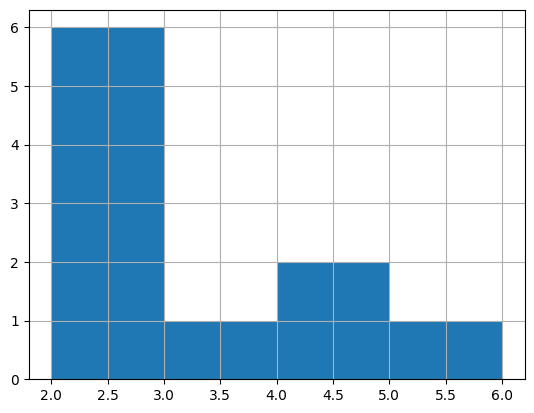

In [ ]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

**Instructions 2/4**

Count the number of each `group_size` in `restaurant_groups`, then divide by the number of rows in `restaurant_groups` to calculate the probability of randomly selecting a group of each size. Save as `size_dist`.

Reset the index of `size_dist`.

Rename the columns of `size_dist` to `group_size` and `prob`.

In [ ]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / len(restaurant_groups)
# size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


**Instructions 3/4**

Calculate the expected value of the `size_dist`, which represents the expected group size, by multiplying the `group_size` by the `prob` and taking the sum.



In [ ]:
# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2.9000000000000004


**Instructions 4/4**


Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.



In [ ]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist['group_size'] >= 4

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more * size_dist['prob'])
print(prob_4_or_more)

0.30000000000000004


**Result**

In [ ]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
print(size_dist)

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('expected_value =',expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist['group_size'] >= 4

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more * size_dist['prob'])
print('prob_4_or_more =',prob_4_or_more)

group_size
2    0.6
4    0.2
6    0.1
3    0.1
Name: count, dtype: float64
expected_value = 2.9000000000000004
prob_4_or_more = 0.30000000000000004


### Identifying distributions

Which sample is most likely to have been taken from a uniform distribution?

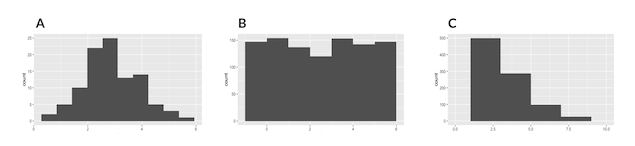

Answer: B

A: similar to Normal (Gaussian) distribution.

C: right-skewed distribution

### Expected value vs. sample mean

The app to the right will take a sample from a discrete uniform distribution, which includes the numbers 1 through 9, and calculate the sample's mean. You can adjust the size of the sample using the slider. Note that the expected value of this distribution is 5.

A sample is taken, and you win twenty dollars if the sample's mean is less than 4. There's a catch: you get to pick the sample's size.

Which sample size is most likely to win you the twenty dollars?

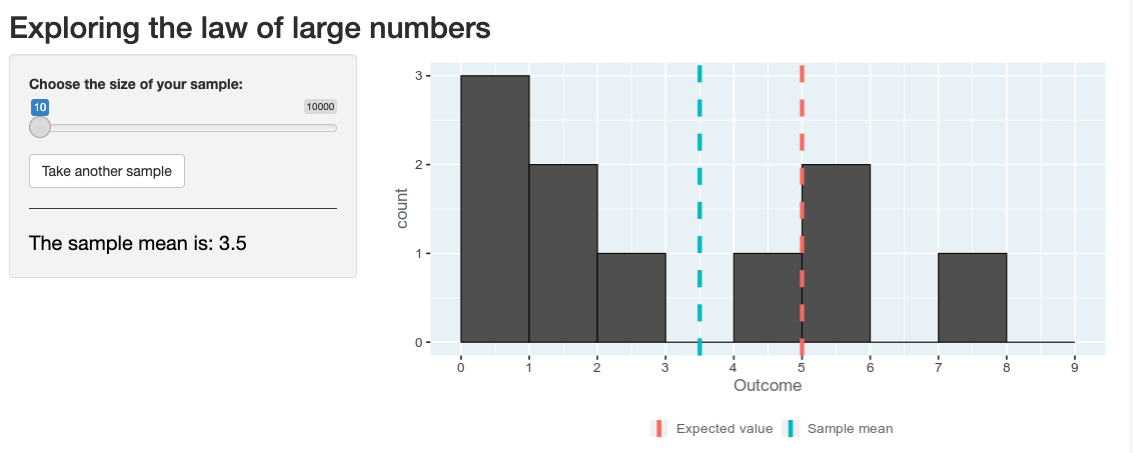
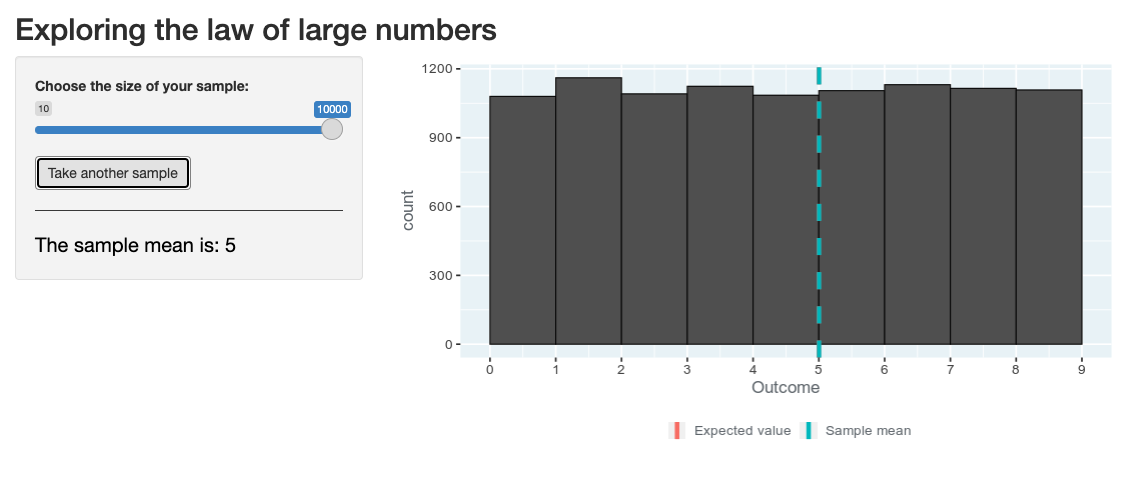

Since the sample mean will likely be closer to 5 (the expected value) with larger sample sizes, you have a better chance of getting a sample mean further away from 5 with a smaller sample.

## **Continuous distributions**

### Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

**instruction 1/4**

To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as `min_time` and his longest possible wait time as `max_time`. Remember that back-ups happen every 30 minutes.

In [ ]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

**instruction 2/4**

Import uniform from `scipy.stats` and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called `prob_less_than_5`.



In [ ]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


**instruction 3/4**

Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called `prob_greater_than_5`.

In [ ]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


`instruction 4/4`

Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called `prob_between_10_and_20`.

In [ ]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333


There's a 33% chance that Amir will wait 10-20 minutes. In the next exercise, you'll make sure this calculation holds up by simulating some wait times.

### Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.



**Instructions 1/4**

* import uniform

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform

**Instructions 2/4**

* Set the random seed to 334.

In [ ]:
np.random.seed(334)

**Instructions 3/4**

* Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as `wait_times`.

In [ ]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)
wait_times

array([ 7.144097  ,  0.97455866,  3.72802787,  5.11644319,  8.70602482,
       24.69140099, 23.98012075,  3.19592668, 25.1985306 , 17.89048629,
       24.68695356, 18.27160808, 22.85829011,  0.12929581, 15.67789664,
        2.3262095 , 15.79151771, 21.90473557, 18.25817257, 15.78657023,
       28.74328434,  9.38971275, 17.0010565 ,  0.95433991, 15.96917606,
        2.16395679,  8.903302  , 19.24982156,  6.52414731, 14.10185677,
       27.86973455, 14.38121016, 28.59233824, 13.17550521, 22.96382405,
        2.52904371,  6.2163781 ,  8.40217036,  4.48079914, 28.16365298,
       19.73302715,  3.63959282,  1.74002295,  1.5324219 , 26.97096908,
       29.37490861,  4.71379092,  6.44990488,  6.81999564, 22.81302458,
       12.41563042, 11.14591581,  8.08043184, 29.60574053,  3.24571518,
       19.66709277, 13.38939302, 29.56433707, 24.84697258,  6.249684  ,
       15.07668579,  5.27474477, 27.27430815,  2.42084219, 27.88317515,
        0.81231424,  3.48564273, 19.80738592,  6.11128124, 19.10

**Instructions 4/4**

* Create a histogram of the simulated wait times and show the plot.

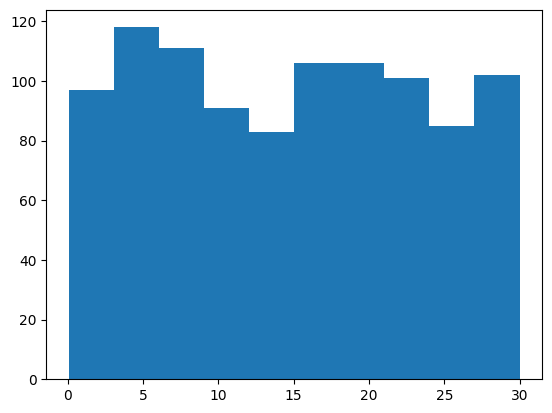

In [ ]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

## **The binomial distribution**

### Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

**Instructions**

1. Import binom from scipy.stats and set the random seed to 10.
2. Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
3. Simulate a typical week of Amir's deals, or one week of 3 deals.
4. Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
Print the mean number of deals he won per week.




In [ ]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3,0.3,size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.3,size=52)

# Print mean deals won per week
print(deals.mean())

[1]
[0]
0.8461538461538461


## 自動更新到google drive跟github

In [ ]:
# Run sync functions
upload_to_drive(file_path, file_id)
sync_to_github(repo_path, "Auto-update after running all cells")

File updated in Google Drive: Random Numbers and Probability.ipynb
Error in GitHub sync: Command '['git', '-C', '/content/DataCamp', 'commit', '-m', 'Auto-update after running all cells']' returned non-zero exit status 1.
